# Telco Churn

In this example, we use the Telco Churn dataset to predict which Telco user is likely to churn; that is, customers that will likely stop using Telco. You can download the Jupyter Notebook of the study <a href="churn.ipynb">here</a> and the dataset from <a href="https://www.kaggle.com/blastchar/telco-customer-churn">Kaggle</a>.

<ul class="ul_content">    
    <li>Churn - customers that left within the last month</li>
    <li>Services - services of each customer (phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies)</li>
    <li>Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges</li>
    <li>Customer demographics - gender, age range, and if they have partners and dependents</li>
</ul>

We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.

## Initialization

Let's create the Virtual DataFrame of the dataset.

In [16]:
from verticapy import *
print(verticapy.__version__)

0.4.0


In [2]:
from verticapy.connections.connect import *
conn_info = {'host': '78.129.138.120',
             'port': '5433',
             'user': 'odsc',
             'password': 'ODSC2021', 
             'database': 'ODSC',
             'session_label': 'some_label',
             'unicode_error': 'strict'}

new_auto_connection(conn_info, name = 'my_cluster')
change_auto_connection('my_cluster')

In [17]:
read_auto_connect()

In [4]:
drop_table(name = 'public.churn')
read_csv("churn.csv",
        schema = 'public',
        table_name = 'pranjalsingh_churn',
        genSQL = True)

CREATE TABLE "public"."pranjalsingh_churn"("customerID" Varchar(20), "gender" Varchar(20), "SeniorCitizen" Integer, "Partner" Boolean, "Dependents" Boolean, "tenure" Integer, "PhoneService" Boolean, "MultipleLines" Varchar(100), "InternetService" Varchar(22), "OnlineSecurity" Varchar(38), "OnlineBackup" Varchar(38), "DeviceProtection" Varchar(38), "TechSupport" Varchar(38), "StreamingTV" Varchar(38), "StreamingMovies" Varchar(38), "Contract" Varchar(28), "PaperlessBilling" Boolean, "PaymentMethod" Varchar(50), "MonthlyCharges" Numeric(8,3), "TotalCharges" Numeric(9,3), "Churn" Boolean);
COPY "public"."pranjalsingh_churn"("customerID", "gender", "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges", "Churn") FROM {} DELIMITER ',' NULL '' ENCLOSED BY '"' ES

In [5]:
read_csv("churn.csv",
        schema = 'public',
        table_name = 'pranjalsingh_churn')
        #genSQL = True    
churn = vDataFrame('public.pranjalsingh_churn')

The table "public"."pranjalsingh_churn" has been successfully created.


customerID    gender    SeniorCitizen    Partner    Dependents   \\
1      0002-ORFBO    Female                0       True          True   \\
2      0003-MKNFE      Male                0      False         False   \\
3      0004-TLHLJ      Male                0      False         False   \\
4      0011-IGKFF      Male                1       True         False   \\
5      0013-EXCHZ    Female                1       True         False   \\
6      0013-MHZWF    Female                0      False          True   \\
7      0013-SMEOE    Female                1       True         False   \\
8      0014-BMAQU      Male                0       True         False   \\
9      0015-UOCOJ    Female                1      False         False   \\
10     0016-QLJIS    Female                0       True          True   \\
11     0017-DINOC      Male                0      False         False   \\
12     0017-IUDMW    Female                0       True          True   \\
13     0018-NYROU    Female                0       True         False   \\
14     0019-EFAEP    Female                0      False         False   \\
15     0019-GFNTW    Female                0      False         False   \\
16     0020-INWCK    Female                0       True          True   \\
17     0020-JDNXP    Female                0       True          True   \\
18     0021-IKXGC    Female                1      False         False   \\
19     0022-TCJCI      Male                1      False         False   \\
20     0023-HGHWL      Male                1      False         False   \\
21     0023-UYUPN    Female                1       True         False   \\
22     0023-XUOPT    Female                0       True         False   \\
23     0027-KWYKW    Female                0       True          True   \\
24     0030-FNXPP    Female                0      False         False   \\
25     0031-PVLZI    Female                0       True          True   \\
26     0032-PGELS    Female                0       True          True   \\
27     0036-IHMOT    Female                0       True          True   \\
28     0040-HALCW      Male                0       True          True   \\
29     0042-JVWOJ      Male                0      False         False   \\
30     0042-RLHYP    Female                0       True          True   \\
31     0048-LUMLS      Male                0       True          True   \\
32     0048-PIHNL    Female                0       True         False   \\
33     0052-DCKON      Male                0       True         False   \\
34     0052-YNYOT    Female                0      False         False   \\
35     0056-EPFBG      Male                0       True          True   \\
36     0057-QBUQH    Female                0      False          True   \\
37     0058-EVZWM    Female                0       True         False   \\
38     0060-FUALY    Female                0       True         False   \\
39     0064-SUDOG    Female                0       True          True   \\
40     0064-YIJGF      Male                0       True          True   \\
41     0067-DKWBL      Male                1      False         False   \\
42     0068-FIGTF    Female                0      False         False   \\
43     0071-NDAFP      Male                0       True          True   \\
44     0074-HDKDG      Male                0       True          True   \\
45     0076-LVEPS      Male                0      False          True   \\
46     0078-XZMHT      Male                0       True         False   \\
47     0080-EMYVY    Female                0      False         False   \\
48     0080-OROZO    Female                0      False         False   \\
49     0082-LDZUE      Male                0      False         False   \\
50     0082-OQIQY      Male                0      False         False   \\
51     0083-PIVIK      Male                0      False         False   \\
52     0089-IIQKO    Female                0       True          True   \\
53     0093-EXYQL    Female     
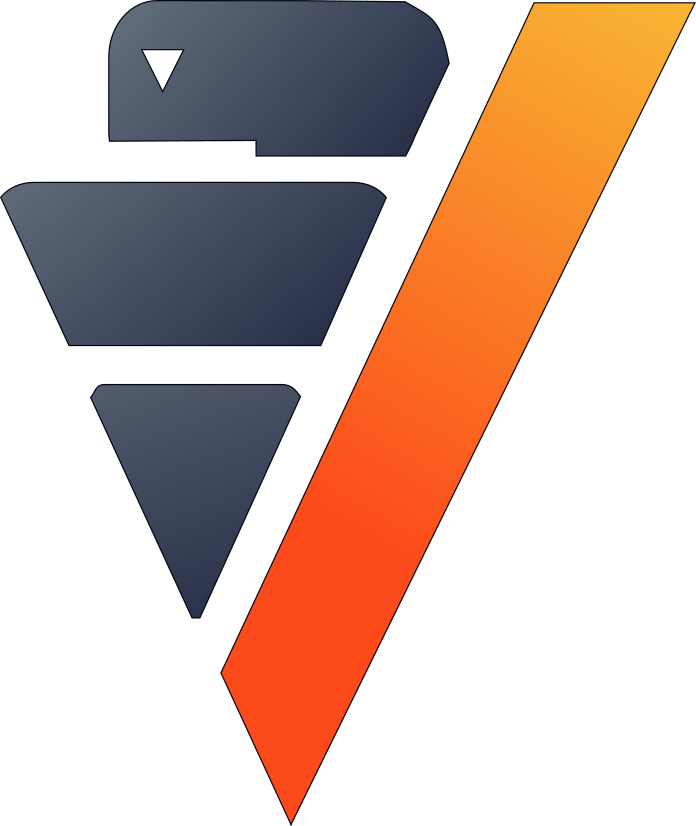

In [19]:
churn

In [7]:
%load_ext verticapy.sql

table_schema_id    table_schema             table_id   \\
1    45035996273704980          public    45035996274074076   \\
2    45035996273704980          public    45035996274074258   \\
3    45035996273704980          public    45035996274074434   \\
4    45035996273704980          public    45035996274121920   \\
5    45035996273704980          public    45035996274122132   \\
             table_name             owner_id    owner_name    is_temp_table   \\
1         pranjal_churn    45035996273840986          odsc            False   \\
2            mark_churn    45035996273840986          odsc            False   \\
3           paige_churn    45035996273840986          odsc            False   \\
4    pranjalsingh_churn    45035996273840986          odsc            False   \\
5            valm_churn    45035996273840986          odsc            False   \\
     is_system_table    force_outer    is_flextable    has_aggregate_projection   \\
1              False              5           False                       False   \\
2              False              5           False                       False   \\
3              False              5           False                       False   \\
4              False              5           False                       False   \\
5              False              5           False                       False   \\
     system_table_creator    partition_expression                         create_time   \\
1                                                    2021-03-29 16:34:06.827741+01:00   \\
2                                                    2021-03-29 16:34:44.524013+01:00   \\
3                                                    2021-03-29 16:35:01.578061+01:00   \\
4                                                    2021-03-30 17:34:38.832521+01:00   \\
5                                                    2021-03-30 17:35:36.232713+01:00   \\
     table_definition        recover_priority    storage_mode   \\
1                        -9223372036854775807          DIRECT   \\
2                        -9223372036854775807          DIRECT   \\
3                        -9223372036854775807          DIRECT   \\
4                        -9223372036854775807          DIRECT   \\
5                        -9223372036854775807          DIRECT   \\
     is_shared    partition_group_expression    active_partition_count  
1        False                                                    None  
2        False                                                    None  
3        False                                                    None  
4        False                                                    None  
5        False                                                    None  
Rows: 5 | Columns: 20
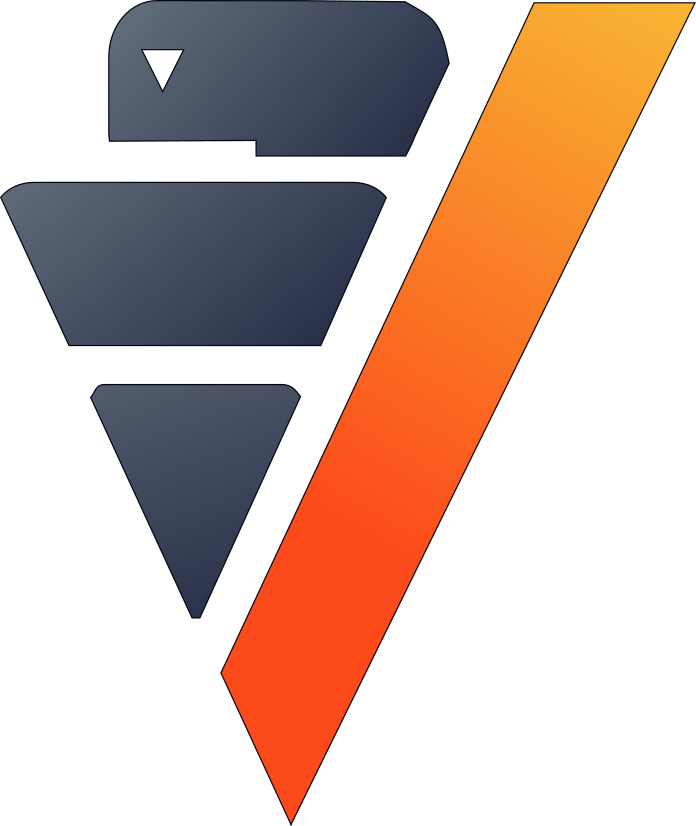

In [20]:
%%sql
SELECT * From tables;

## Data Exploration and Preparation

Let's examine our data.

In [24]:
set_option("sql_on", True)

In [27]:
set_option("sql_on", False)

In [ ]:
churn

dtype    unique    count                 top   \\
"customerID"             varchar(20)      7043     7043          0002-ORFBO   \\
"gender"                 varchar(20)         2     7043                Male   \\
"SeniorCitizen"                  int         2     7043                   0   \\
"Partner"                    boolean         2     7043               False   \\
"Dependents"                 boolean         2     7043               False   \\
"tenure"                         int        73     7043                   1   \\
"PhoneService"               boolean         2     7043                True   \\
"MultipleLines"         varchar(100)         3     7043                  No   \\
"InternetService"        varchar(22)         3     7043         Fiber optic   \\
"OnlineSecurity"         varchar(38)         3     7043                  No   \\
"OnlineBackup"           varchar(38)         3     7043                  No   \\
"DeviceProtection"       varchar(38)         3     7043                  No   \\
"TechSupport"            varchar(38)         3     7043                  No   \\
"StreamingTV"            varchar(38)         3     7043                  No   \\
"StreamingMovies"        varchar(38)         3     7043                  No   \\
"Contract"               varchar(28)         3     7043      Month-to-month   \\
"PaperlessBilling"           boolean         2     7043                True   \\
"PaymentMethod"          varchar(50)         4     7043    Electronic check   \\
"MonthlyCharges"        numeric(8,3)      1585     7043               20.05   \\
"TotalCharges"          numeric(9,3)      6530     7032                None   \\
"Churn"                      boolean         2     7043               False   \\
                        top_percent  
"customerID"                  0.014  
"gender"                     50.476  
"SeniorCitizen"              83.785  
"Partner"                    51.697  
"Dependents"                 70.041  
"tenure"                      8.704  
"PhoneService"               90.317  
"MultipleLines"              48.133  
"InternetService"            43.959  
"OnlineSecurity"             49.666  
"OnlineBackup"               43.845  
"DeviceProtection"           43.944  
"TechSupport"                49.311  
"StreamingTV"                39.898  
"StreamingMovies"            39.543  
"Contract"                   55.019  
"PaperlessBilling"           59.222  
"PaymentMethod"              33.579  
"MonthlyCharges"              0.866  
"TotalCharges"                0.156  
"Churn"                      73.463  
Rows: 1-21 | Columns: 6
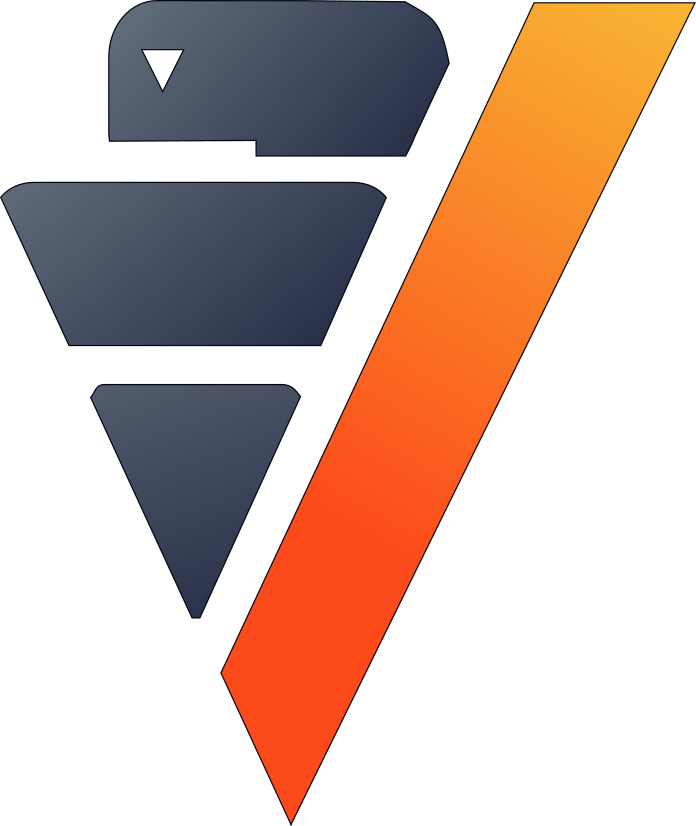

In [21]:
churn.describe(method = "categorical")

Several variables are categorical, and since they all have low cardinalities, we can compute their dummies. We can also convert all booleans to numeric.

In [22]:
for column in ["DeviceProtection", 
               "MultipleLines",
               "PaperlessBilling",
               "Churn",
               "TechSupport",
               "Partner",
               "StreamingTV",
               "OnlineBackup",
               "Dependents",
               "OnlineSecurity",
               "PhoneService",
               "StreamingMovies"]:
    churn[column].decode("Yes",1,0)

In [ ]:
#churn

SeniorCitizen    Partner    Dependents    tenure    PhoneService   \\
1                  0          1             1         9               1   \\
2                  0          0             0         9               1   \\
3                  0          0             0         4               1   \\
4                  1          1             0        13               1   \\
5                  1          1             0         3               1   \\
6                  0          0             1         9               1   \\
7                  1          1             0        71               1   \\
8                  0          1             0        63               1   \\
9                  1          0             0         7               1   \\
10                 0          1             1        65               1   \\
11                 0          0             0        54               0   \\
12                 0          1             1        72               1   \\
13                 0          1             0         5               1   \\
14                 0          0             0        72               1   \\
15                 0          0             0        56               0   \\
16                 0          1             1        71               1   \\
17                 0          1             1        34               0   \\
18                 1          0             0         1               1   \\
19                 1          0             0        45               1   \\
20                 1          0             0         1               0   \\
21                 1          1             0        50               1   \\
22                 0          1             0        13               1   \\
23                 0          1             1        23               1   \\
24                 0          0             0         3               1   \\
25                 0          1             1         4               1   \\
26                 0          1             1         1               0   \\
27                 0          1             1        55               1   \\
28                 0          1             1        54               1   \\
29                 0          0             0        26               1   \\
30                 0          1             1        69               1   \\
31                 0          1             1        37               1   \\
32                 0          1             0        49               1   \\
33                 0          1             0        66               1   \\
34                 0          0             0        67               1   \\
35                 0          1             1        20               0   \\
36                 0          0             1        43               1   \\
37                 0          1             0        55               1   \\
38                 0          1             0        59               1   \\
39                 0          1             1        12               1   \\
40                 0          1             1        27               1   \\
41                 1          0             0         2               1   \\
42                 0          0             0        27               1   \\
43                 0          1             1        25               1   \\
44                 0          1             1        25               1   \\
45                 0          0             1        29               0   \\
46                 0          1             0        72               1   \\
47                 0          0             0        14               1   \\
48                 0          0             0        35               1   \\
49                 0          0             0         1               1   \\
50                 0          0             0        29               1   \\
51                 0          0             0        64               1   \\
52 
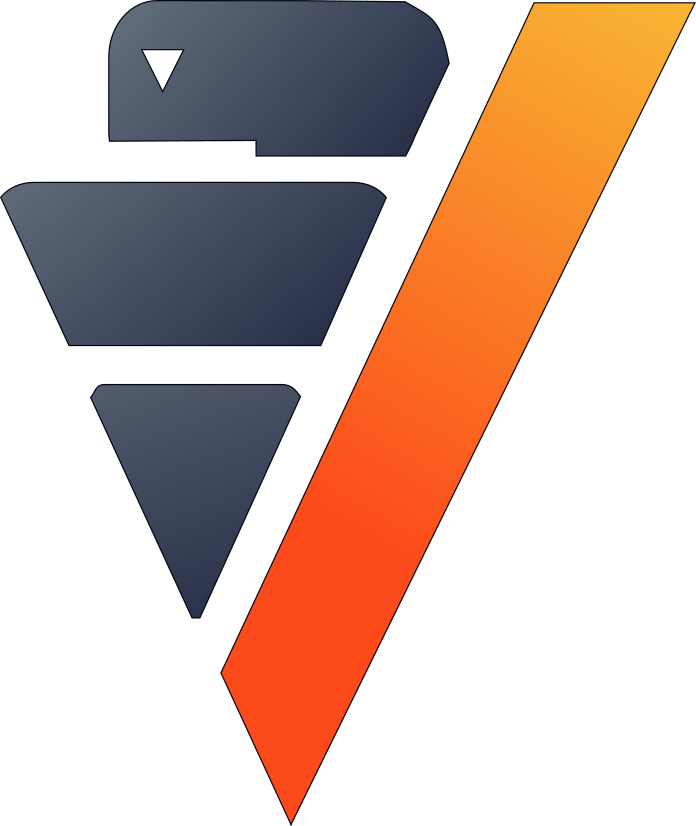

In [23]:
churn.get_dummies().drop(["customerID", 
                          "gender", 
                          "Contract", 
                          "PaymentMethod", 
                          "InternetService"])

SeniorCitizen    Partner    Dependents    tenure    PhoneService   \\
1                  0          1             1         9               1   \\
2                  0          0             0         9               1   \\
3                  0          0             0         4               1   \\
4                  1          1             0        13               1   \\
5                  1          1             0         3               1   \\
6                  0          0             1         9               1   \\
7                  1          1             0        71               1   \\
8                  0          1             0        63               1   \\
9                  1          0             0         7               1   \\
10                 0          1             1        65               1   \\
11                 0          0             0        54               0   \\
12                 0          1             1        72               1   \\
13                 0          1             0         5               1   \\
14                 0          0             0        72               1   \\
15                 0          0             0        56               0   \\
16                 0          1             1        71               1   \\
17                 0          1             1        34               0   \\
18                 1          0             0         1               1   \\
19                 1          0             0        45               1   \\
20                 1          0             0         1               0   \\
21                 1          1             0        50               1   \\
22                 0          1             0        13               1   \\
23                 0          1             1        23               1   \\
24                 0          0             0         3               1   \\
25                 0          1             1         4               1   \\
26                 0          1             1         1               0   \\
27                 0          1             1        55               1   \\
28                 0          1             1        54               1   \\
29                 0          0             0        26               1   \\
30                 0          1             1        69               1   \\
31                 0          1             1        37               1   \\
32                 0          1             0        49               1   \\
33                 0          1             0        66               1   \\
34                 0          0             0        67               1   \\
35                 0          1             1        20               0   \\
36                 0          0             1        43               1   \\
37                 0          1             0        55               1   \\
38                 0          1             0        59               1   \\
39                 0          1             1        12               1   \\
40                 0          1             1        27               1   \\
41                 1          0             0         2               1   \\
42                 0          0             0        27               1   \\
43                 0          1             1        25               1   \\
44                 0          1             1        25               1   \\
45                 0          0             1        29               0   \\
46                 0          1             0        72               1   \\
47                 0          0             0        14               1   \\
48                 0          0             0        35               1   \\
49                 0          0             0         1               1   \\
50                 0          0             0        29               1   \\
51                 0          0             0        64               1   \\
52 
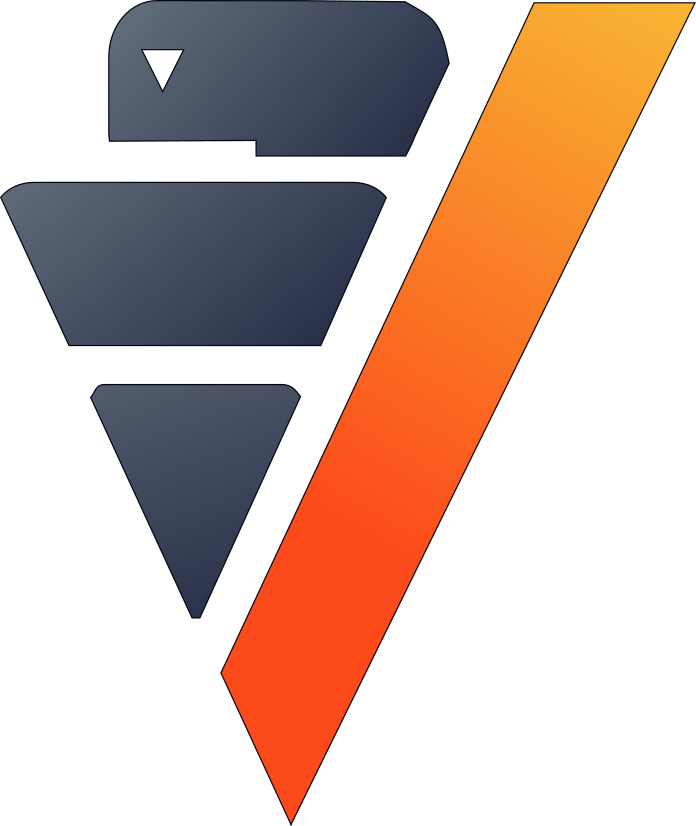

In [25]:
churn

Let's compute the correlations between the different variables and the response column. Finding these relationships is one of the main purposes of data science, and understanding these correlations can help us make better decisions.

"Churn"  
"Churn"                                       1.0  
"Contract_Month-to-month"                   0.405  
"tenure"                                   -0.352  
"InternetService_Fiber_optic"               0.308  
"PaymentMethod_Electronic_check"            0.302  
"TotalCharges"                             -0.199  
"MonthlyCharges"                            0.193  
"PaperlessBilling"                          0.192  
"Contract_One_year"                        -0.178  
"OnlineSecurity"                           -0.171  
"TechSupport"                              -0.165  
"Dependents"                               -0.164  
"SeniorCitizen"                             0.151  
"Partner"                                   -0.15  
"PaymentMethod_Credit_card_(automatic)"    -0.134  
"InternetService_DSL"                      -0.124  
"PaymentMethod_Bank_transfer_(automat...   -0.118  
"OnlineBackup"                             -0.082  
"DeviceProtection"                         -0.066  
"StreamingTV"                               0.063  
"StreamingMovies"                           0.061  
"MultipleLines"                              0.04  
"PhoneService"                              0.012  
"gender_Female"                             0.009  
Rows: 1-24 | Columns: 2
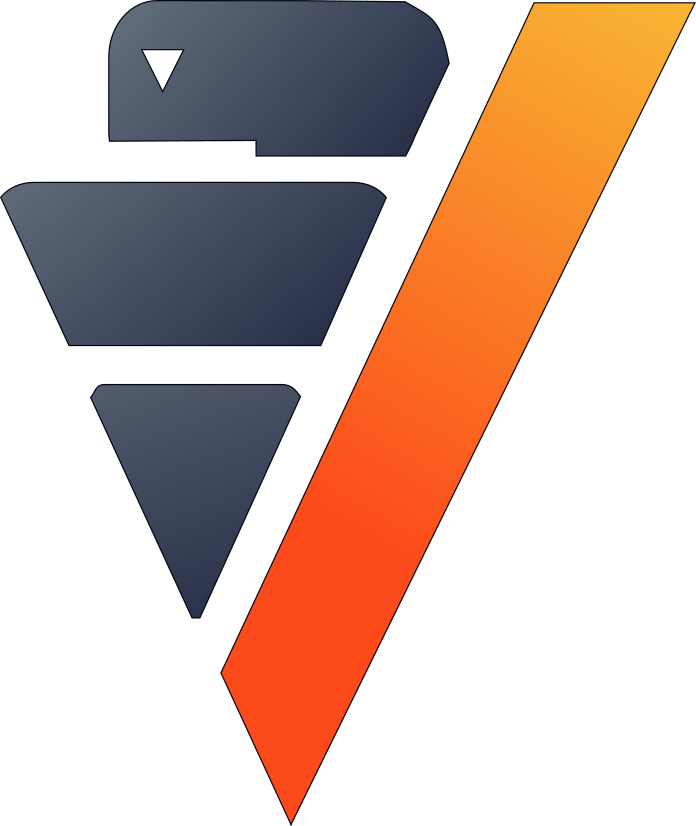

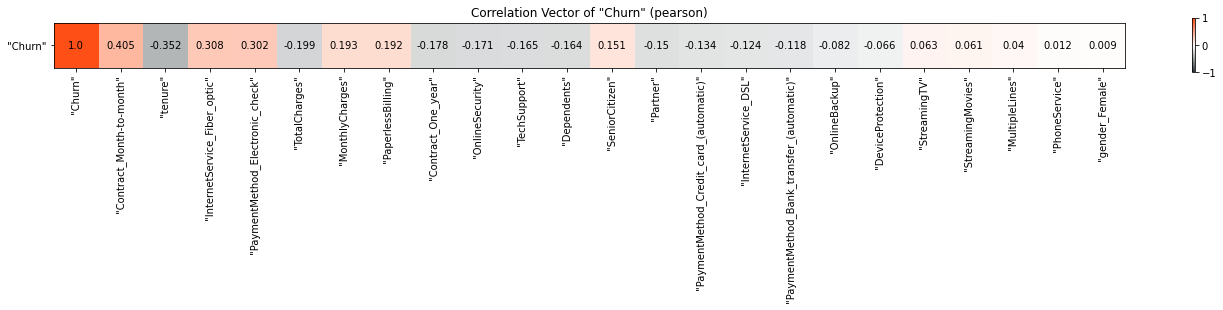

In [28]:
%matplotlib inline
churn.corr(focus = 'Churn')

"SeniorCitizen"                "Partner"            "Dependents"   \\
"SeniorCitizen"                                           1.0       0.0164786575974139      -0.211185088493958   \\
"Partner"                                  0.0164786575974139                      1.0       0.452676282929464   \\
"Dependents"                               -0.211185088493958        0.452676282929464                     1.0   \\
"tenure"                                   0.0165668776818093        0.379697461168293       0.159712331216918   \\
"PhoneService"                            0.00857640107927944        0.017705663223972    -0.00176167854468371   \\
"MultipleLines"                             0.142948174762762        0.142057079362286     -0.0245258044141006   \\
"OnlineSecurity"                          -0.0386527044971951        0.143106227502644      0.0809716602324835   \\
"OnlineBackup"                             0.0665721351451346        0.141498019472281      0.0236710130105134   \\
"DeviceProtection"                          0.059428494286933        0.153786435630779      0.0139625356537902   \\
"TechSupport"                             -0.0606245906935632        0.119998869764316      0.0632681413996536   \\
"StreamingTV"                               0.105377667842824        0.124665800564917     -0.0165577429510374   \\
"StreamingMovies"                           0.120176251188966        0.117411854471945     -0.0397409620589235   \\
"PaperlessBilling"                          0.156529559311173       -0.014876622287891      -0.111377229193644   \\
"MonthlyCharges"                            0.220173338576274        0.096847936256471      -0.113890230021937   \\
"TotalCharges"                              0.102410605395332        0.319072363238569      0.0646532494217718   \\
"Churn"                                     0.150889328176473       -0.150447544959177      -0.164221401579725   \\
"gender_Female"                           0.00187371163826074      0.00180807966178902     -0.0105166119227341   \\
"InternetService_DSL"                      -0.108322213698583    -0.000850924773952092      0.0520103480646735   \\
"InternetService_Fiber_optic"               0.255337772955128     0.000303665416464253      -0.165818358755423   \\
"Contract_Month-to-month"                   0.138360464402643       -0.280865226108315      -0.231720166129716   \\
"Contract_One_year"                       -0.0462624429270194       0.0827833074814833      0.0683684804382201   \\
"PaymentMethod_Bank_transfer_(automat...  -0.0161589408621996        0.110706369524778      0.0520209809474006   \\
"PaymentMethod_Credit_card_(automatic)"   -0.0241353723603189       0.0820291964573261      0.0602670001763671   \\
"PaymentMethod_Electronic_check"            0.171717778690937      -0.0838516893627101      -0.150642488479113   \\
                                                      "tenure"           "PhoneService"         "MultipleLines"   \\
"SeniorCitizen"                             0.0165668776818093      0.00857640107927944       0.142948174762762   \\
"Partner"                                    0.379697461168293        0.017705663223972       0.142057079362286   \\
"Dependents"                                 0.159712331216918     -0.00176167854468371     -0.0245258044141006   \\
"tenure"                                                   1.0      0.00844820673274375       0.331940555609186   \\
"PhoneService"                             0.00844820673274375                      1.0       0.279689994742913   \\
"MultipleLines"                              0.331940555609186        0.279689994742913                     1.0   \\
"OnlineSecurity"                             0.327202773168245       -0.092892700112209      0.0981081396972639   \\
"OnlineBackup"                               0.360276988984674      -0.0523122429476356       0.202237016320495   \\
"DeviceProtection"                           0.360652866932473      -0.0712268867174749      
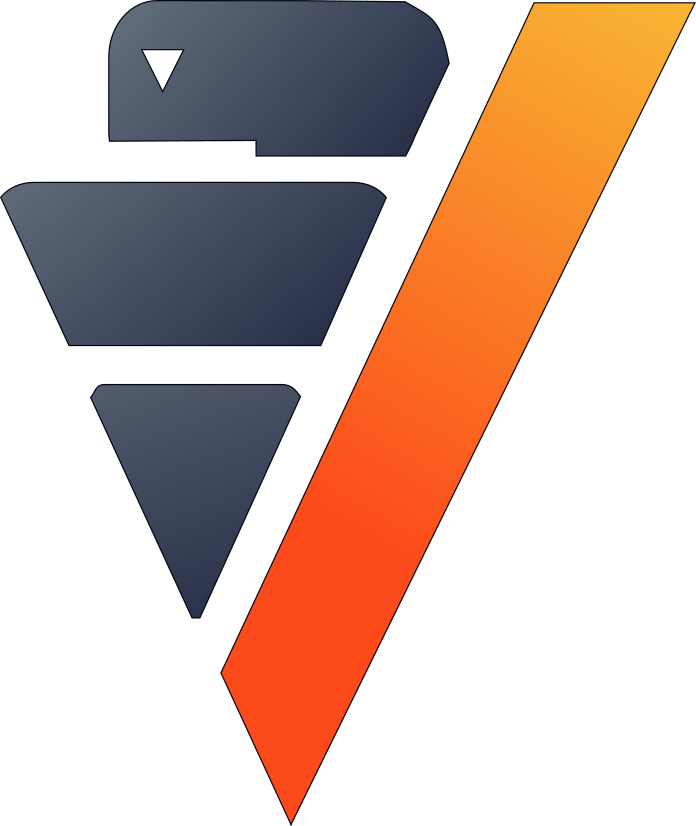

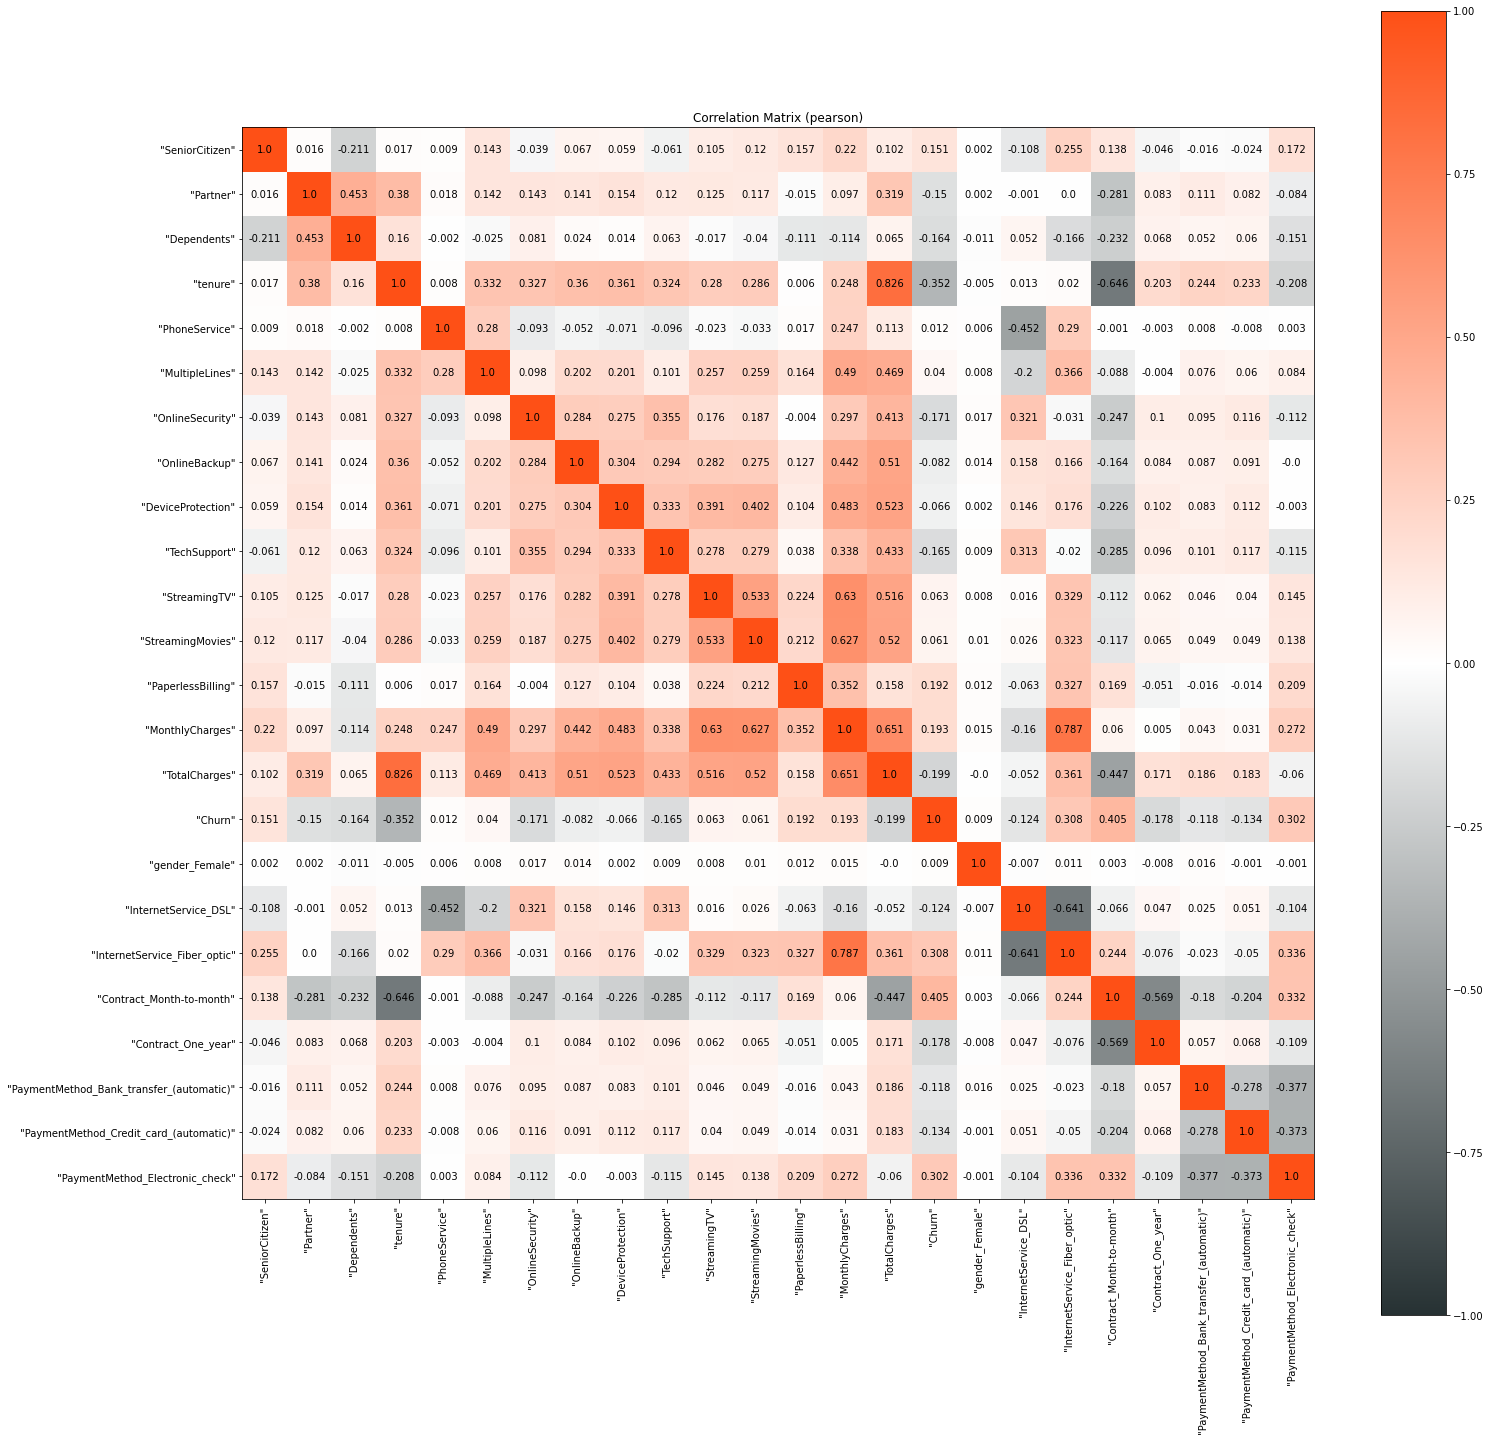

In [29]:
churn.corr(method = 'pearson')

Many features have a strong correlation with the 'Churn' variable. For example, the customers that have a 'Month to Month' contract are more likely to churn. Having this type of contract gives customers a lot of flexibility and allows them to leave at any time. New customers are also likely to churn.

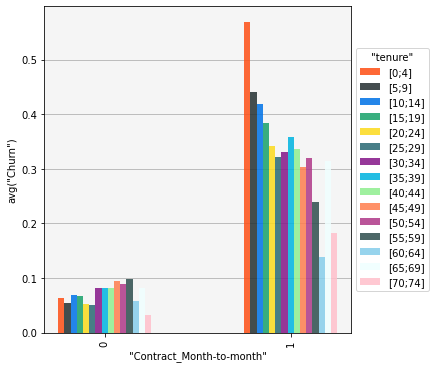

In [30]:
# No lock-in = Churn
churn.hist(["Contract_Month-to-month", "tenure"], method = "avg", of = "Churn")

The following scatter plot shows that providing better plans can prevent churning. Indeed, customers having high total charges are more likely to churn even if they've been with the company for a long time.

This pulls data from the database, we're not limited by memory, Python wouldn't be able plot TBs, but VerticaPy can.

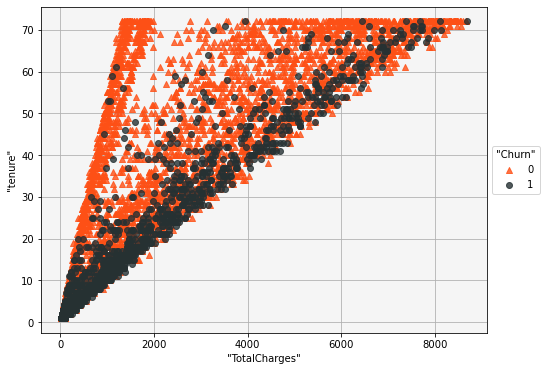

In [31]:
churn.scatter(["TotalCharges", "tenure"], catcol = "Churn")

Let's move on to machine learning.

## Machine Learning

Logistic regression is a very powerful algorithm that can detect churns. Let's use a cross validation to evaluate our model.

auc                  prc_auc                accuracy   \\
1-fold        0.8452306594493947       0.6566803659655251      0.7608333333333334   \\
2-fold        0.8516303531985137       0.6660610568524844      0.7742203742203743   \\
3-fold        0.8433104079666833       0.6666926895630818      0.7610198789974071   \\
avg           0.8467238068715306       0.6631447041270304      0.7653578621837049   \\
std         0.004356315999022259    0.0056071820792617825    0.007675727295916534   \\
                         log_loss               precision                 recall   \\
1-fold           0.18082964209881      0.5291005291005291      0.794912559618442   \\
2-fold          0.178527092145176      0.5494505494505495     0.7898894154818326   \\
3-fold          0.184603114687254      0.5465631929046563     0.7739403453689168   \\
avg           0.18131994964374668      0.5417047571519116     0.7862474401563971   \\
std         0.0030675419474599373    0.011010637153871797    0.01095017948872564   \\
                        f1_score                     mcc            informedness   \\
1-fold          0.77113018840932      0.4893282357205907       0.543642090956669   \\
2-fold        0.7791111268738424      0.5071369709430437      0.5585124403125323   \\
3-fold         0.764922357426871      0.4854387902820498      0.5300524503182311   \\
avg           0.7717212242366778      0.4939679989818947      0.5440689938624775   \\
std         0.007112825536785154    0.011569283181770255    0.014234796879027537   \\
                      markedness                    csi  
1-fold        0.4404407352860962     0.4655493482309125  
2-fold       0.46048733874820824     0.4793863854266539  
3-fold       0.44458019007179495     0.4713193116634799  
avg           0.4485027547020331    0.47208501510701545  
std         0.010583310566669937    0.00695022488209299  
Rows: 1-5 | Columns: 12
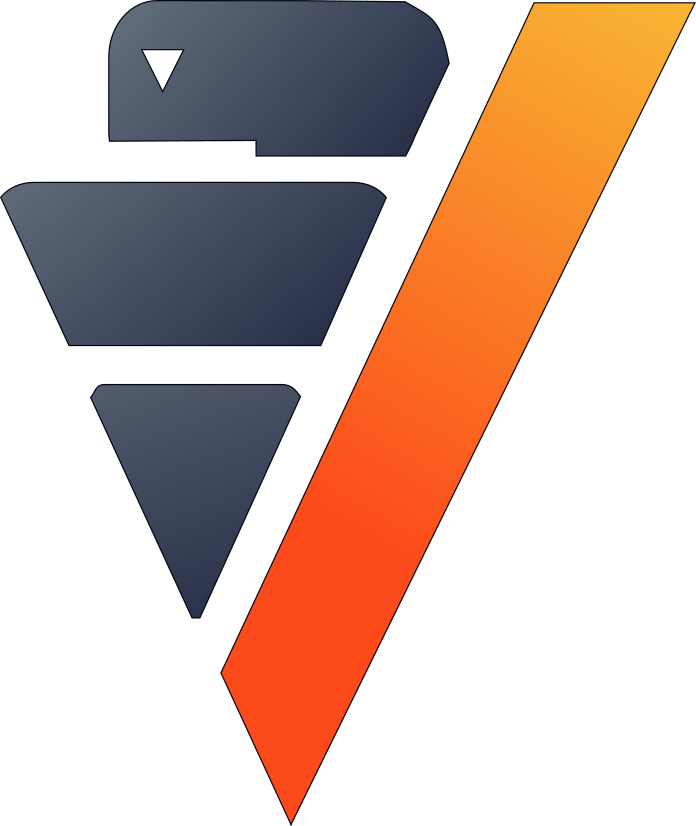

In [32]:
from verticapy.learn.linear_model import LogisticRegression
model = LogisticRegression("churn_model", 
                           penalty = 'L2', 
                           tol = 1e-6, 
                           max_iter = 1000, 
                           solver = "BFGS")

from verticapy.learn.model_selection import cross_validate
cross_validate(model, churn, churn.get_columns(exclude_columns = ["churn"]), 'churn')
#results

The model is excellent! Let's run some machine learning on the entire dataset and compute the importance of each feature.


importance    sign  
tenure                                         28.58      -1  
totalcharges                                   18.43       1  
contract_month-to-month                         8.66       1  
internetservice_fiber_optic                      7.0       1  
monthlycharges                                  5.79       1  
phoneservice                                    5.26      -1  
contract_one_year                               4.31       1  
internetservice_dsl                             3.58       1  
onlinesecurity                                  2.93      -1  
techsupport                                     2.81      -1  
paymentmethod_electronic_check                   2.4       1  
paperlessbilling                                2.29       1  
seniorcitizen                                   1.45       1  
onlinebackup                                     1.4      -1  
multiplelines                                   1.34       1  
dependents                                      0.97      -1  
streamingmovies                                 0.73       1  
streamingtv                                     0.68       1  
deviceprotection                                0.63      -1  
paymentmethod_bank_transfer_(automatic)         0.39       1  
paymentmethod_credit_card_(automatic)           0.21      -1  
gender_female                                   0.17       1  
partner                                          0.0      -1  
Rows: 1-23 | Columns: 3
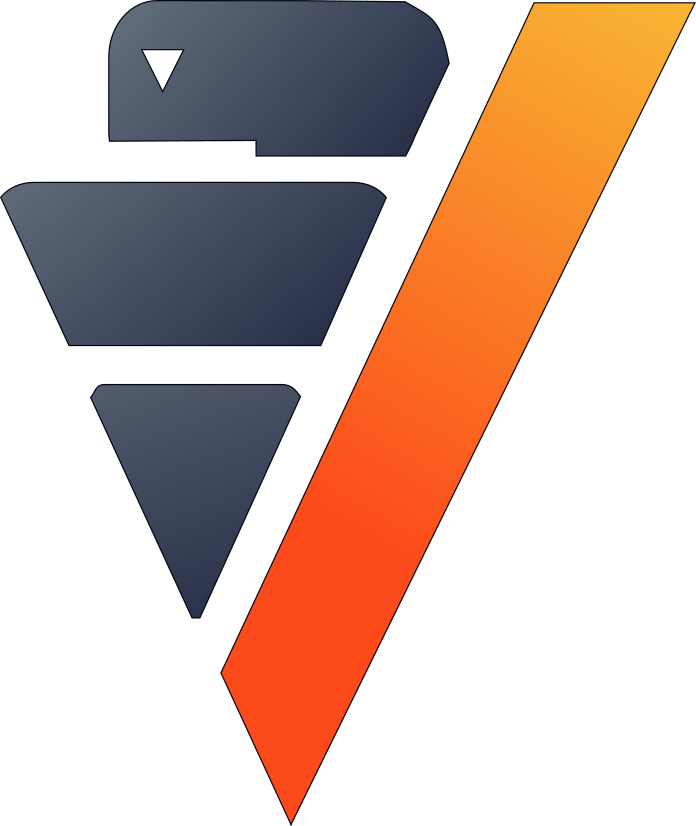

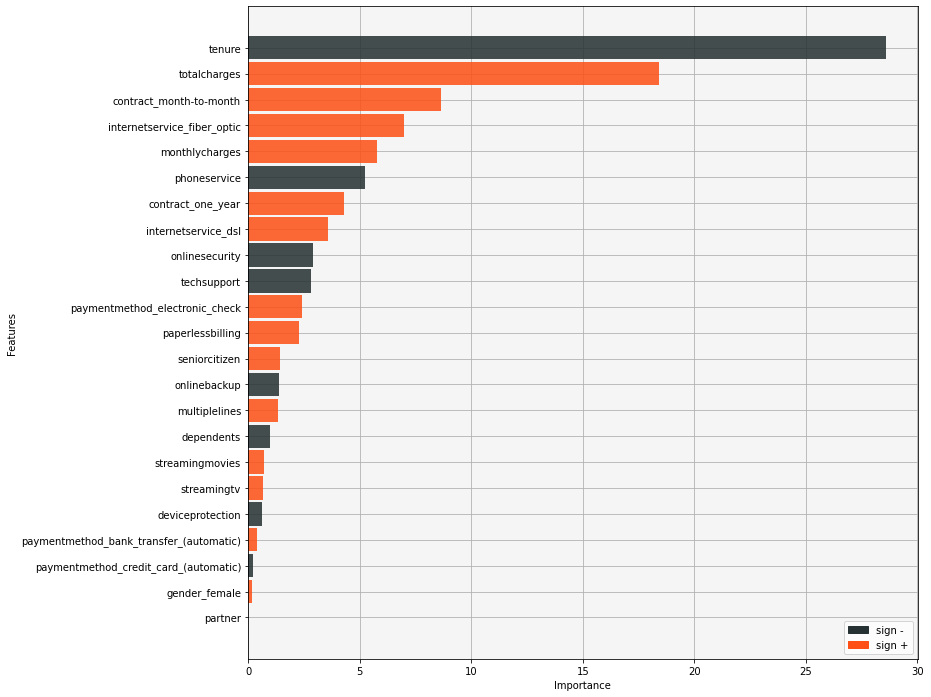

In [33]:
model.fit(churn, 
          churn.get_columns(exclude_columns = ["churn"]), 
          'churn')
model.features_importance()
# We can use all the variables without limiting performance

threshold          false_positive           true_positive  
1             0.0                     1.0                     1.0  
2           0.001                     1.0                     1.0  
3           0.002       0.984698818516366                     1.0  
4           0.003       0.961650203370134       0.999464954521134  
5           0.004        0.94325004842146       0.998929909042269  
6           0.005       0.928529924462522       0.998929909042269  
7           0.006       0.916134030602363       0.997859818084537  
8           0.007       0.902382335851249       0.997324772605671  
9           0.008        0.89114855704048       0.997324772605671  
10          0.009       0.883207437536316        0.99625468164794  
11           0.01       0.872942087933372        0.99625468164794  
12          0.011       0.861514623281038        0.99625468164794  
13          0.012       0.848537671896184       0.995184590690209  
14          0.013        0.83982180902576       0.993579454253612  
15          0.014       0.828200658531861        0.99250936329588  
16          0.015       0.818710052295177       0.991974317817014  
17          0.016       0.809413131900058       0.991974317817014  
18          0.017       0.803021499128414       0.991439272338149  
19          0.018       0.795661437148944       0.990904226859283  
20          0.019       0.789850861901995       0.990904226859283  
21           0.02       0.783846600813481       0.989834135901552  
22          0.021       0.778036025566531       0.989834135901552  
23          0.022       0.770675963587062       0.989299090422686  
24          0.023       0.765640131706372       0.989299090422686  
25          0.024       0.757892698043773       0.989299090422686  
26          0.025       0.752856866163083       0.987693953986089  
27          0.026       0.748789463490219       0.987693953986089  
28          0.027       0.743559945767964       0.987693953986089  
29          0.028       0.738136742204145       0.986623863028357  
30          0.029        0.73290722448189       0.986623863028357  
31           0.03       0.728839821809026       0.986088817549492  
32          0.031       0.725934534185551       0.985553772070626  
33          0.032       0.722448189037381        0.98501872659176  
34          0.033       0.717024985473562        0.98501872659176  
35          0.034       0.711989153592872        0.98501872659176  
36          0.035       0.706953321712183        0.98501872659176  
37          0.036       0.703273290722448        0.98501872659176  
38          0.037       0.698431144683324        0.98501872659176  
39          0.038       0.694944799535154       0.984483681112895  
40          0.039       0.689908967654464       0.983948635634029  
41           0.04       0.684098392407515       0.983948635634029  
42          0.041       0.680612047259345       0.982878544676298  
43          0.042       0.676157272903351       0.982878544676298  
44          0.043       0.673639356963006       0.980738362760835  
45          0.044       0.669184582607011       0.980203317281969  
46          0.045       0.664342436567887       0.979668271803103  
47          0.046       0.659693976370327       0.979668271803103  
48          0.047       0.658144489637807       0.979668271803103  
49          0.048       0.654270772806508       0.979133226324238  
50          0.049       0.651559171024598        0.97752808988764  
51           0.05       0.646910710827039       0.976993044408775  
52          0.051       0.643230679837304       0.975922953451043  
53          0.052       0.639163277164439       0.975922953451043  
54          0.053       0.634708502808445       0.975387907972178  
55          0.054       0.630834785977145       0.974317817014446  
56          0.055        0.62792949835367       0.973782771535581  
57          0.056       0.624055781522371       0.973782771535581  
58          0.057       0.620569436374201       0.97378277153558
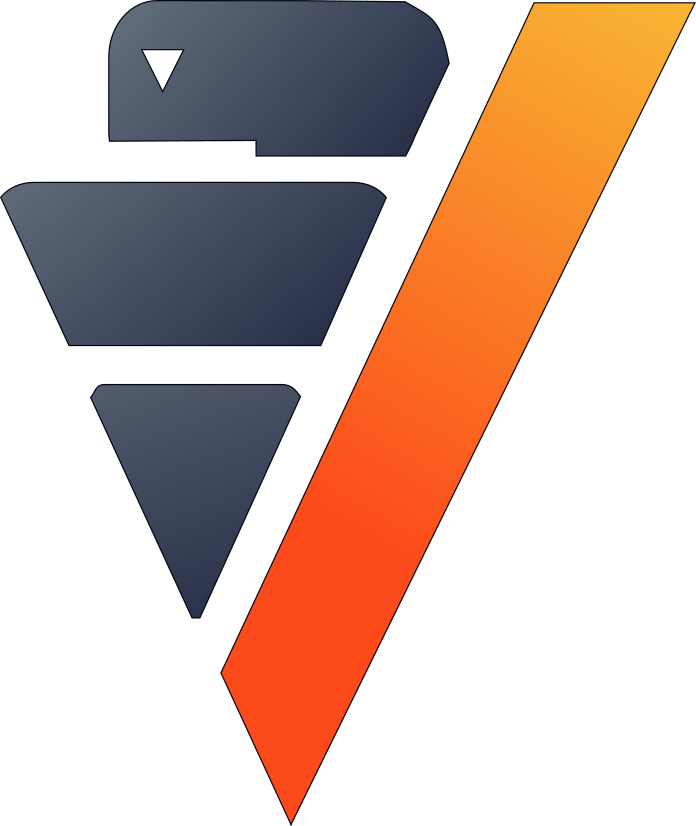

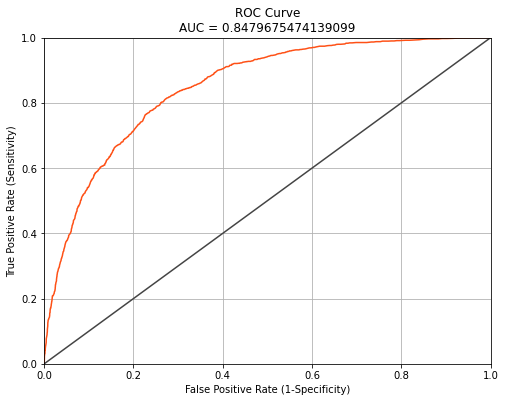

In [34]:
model.roc_curve()

SeniorCitizen    Partner    Dependents    tenure    PhoneService   \\
1                  0          1             1         9               1   \\
2                  0          0             0         9               1   \\
3                  0          0             0         4               1   \\
4                  1          1             0        13               1   \\
5                  1          1             0         3               1   \\
6                  0          0             1         9               1   \\
7                  1          1             0        71               1   \\
8                  0          1             0        63               1   \\
9                  1          0             0         7               1   \\
10                 0          1             1        65               1   \\
11                 0          0             0        54               0   \\
12                 0          1             1        72               1   \\
13                 0          1             0         5               1   \\
14                 0          0             0        72               1   \\
15                 0          0             0        56               0   \\
16                 0          1             1        71               1   \\
17                 0          1             1        34               0   \\
18                 1          0             0         1               1   \\
19                 1          0             0        45               1   \\
20                 1          0             0         1               0   \\
21                 1          1             0        50               1   \\
22                 0          1             0        13               1   \\
23                 0          1             1        23               1   \\
24                 0          0             0         3               1   \\
25                 0          1             1         4               1   \\
26                 0          1             1         1               0   \\
27                 0          1             1        55               1   \\
28                 0          1             1        54               1   \\
29                 0          0             0        26               1   \\
30                 0          1             1        69               1   \\
31                 0          1             1        37               1   \\
32                 0          1             0        49               1   \\
33                 0          1             0        66               1   \\
34                 0          0             0        67               1   \\
35                 0          1             1        20               0   \\
36                 0          0             1        43               1   \\
37                 0          1             0        55               1   \\
38                 0          1             0        59               1   \\
39                 0          1             1        12               1   \\
40                 0          1             1        27               1   \\
41                 1          0             0         2               1   \\
42                 0          0             0        27               1   \\
43                 0          1             1        25               1   \\
44                 0          1             1        25               1   \\
45                 0          0             1        29               0   \\
46                 0          1             0        72               1   \\
47                 0          0             0        14               1   \\
48                 0          0             0        35               1   \\
49                 0          0             0         1               1   \\
50                 0          0             0        29               1   \\
51                 0          0             0        64               1   \\
52 
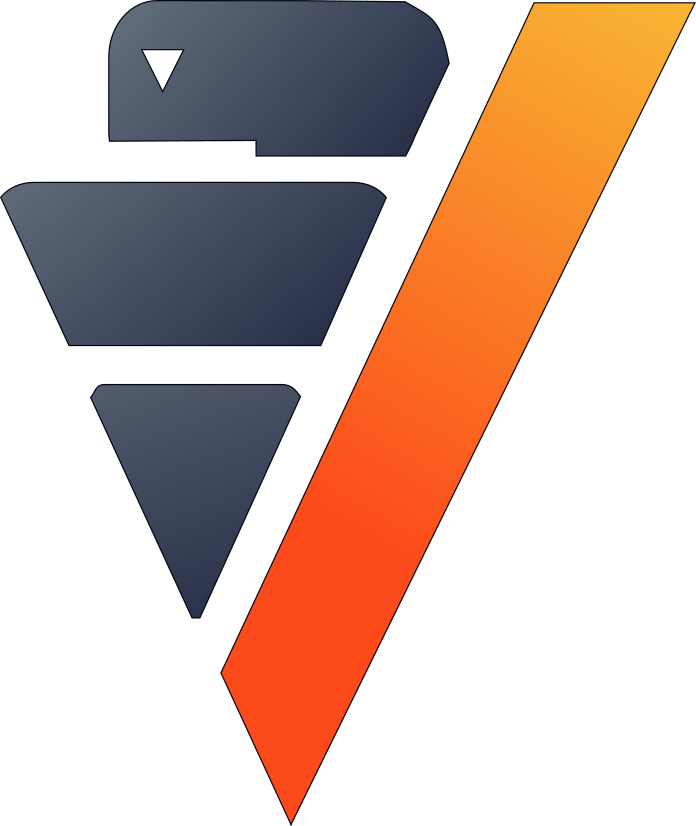

In [35]:
model.predict(churn,
              X = churn.get_columns(exclude_columns = ["churn"]),
              name = 'pred_probs')

SeniorCitizen    Partner    Dependents    tenure    PhoneService   \\
1                  0          1             1         0               0   \\
2                  0          1             1         0               0   \\
3                  0          1             1         0               1   \\
4                  0          1             1         0               1   \\
5                  0          1             1         0               1   \\
6                  0          1             1         0               1   \\
7                  0          0             1         0               1   \\
8                  0          1             1         0               1   \\
9                  0          1             1         0               1   \\
10                 0          1             1         0               1   \\
11                 0          0             1         0               1   \\
12                 1          1             0         1               1   \\
13                 1          0             0         1               1   \\
14                 1          0             0         1               1   \\
15                 1          1             0         1               1   \\
16                 1          0             0         2               1   \\
17                 1          0             0         2               1   \\
18                 1          0             0         2               1   \\
19                 1          0             0         3               1   \\
20                 1          0             0         4               1   \\
21                 1          0             0         4               1   \\
22                 1          1             0         3               1   \\
23                 1          0             0         1               1   \\
24                 1          0             0         1               1   \\
25                 1          1             0         1               1   \\
26                 0          0             0         1               1   \\
27                 1          0             0         2               1   \\
28                 1          1             0         7               1   \\
29                 1          0             0         2               1   \\
30                 0          0             0         1               1   \\
31                 1          0             0         1               1   \\
32                 0          0             0         1               1   \\
33                 0          0             0         2               1   \\
34                 0          0             0         2               1   \\
35                 1          0             0         1               1   \\
36                 1          0             0         8               1   \\
37                 1          1             0         7               1   \\
38                 0          0             0         3               1   \\
39                 0          1             0         3               1   \\
40                 0          0             0         1               1   \\
41                 1          1             0         3               1   \\
42                 1          0             0         1               1   \\
43                 1          0             0         2               1   \\
44                 1          0             0         9               1   \\
45                 1          0             0         4               1   \\
46                 1          0             0         3               1   \\
47                 1          0             0        10               1   \\
48                 1          1             0        11               1   \\
49                 1          1             0         4               1   \\
50                 0          0             0         3               1   \\
51                 1          0             0         6               1   \\
52 
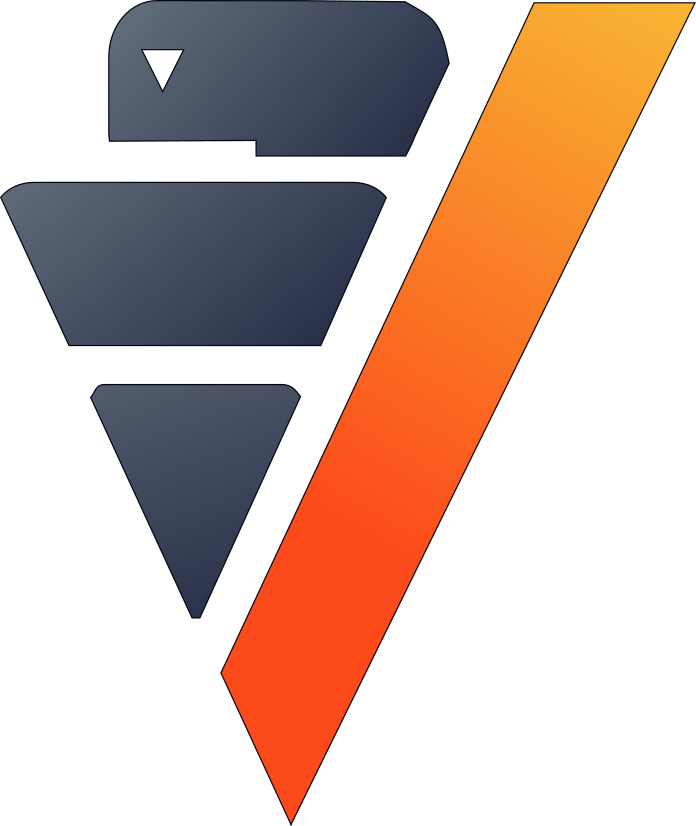

In [36]:
churn.sort({"pred_probs":"desc"})

Based on our model, most churning customers are at least one of the following:
<ul>
 <li>Paying higher bills</li>
 <li>New to Telco customers</li>
 <li>Have a monthly contract</li>
</ul>

Notice that customers have a 'Fiber Optic' option are also likely to churn. Let's check if this relationship is causal by computing some aggregations.

In [37]:
set_option("sql_on", True)

InternetService_Fiber_optic              tenure        totalcharges   \\
1                              0    31.9422346085635    1558.06548526423   \\
2                              1    32.9179586563307    3205.30457041344   \\
     contract_month_to_month      monthlycharges  
1          0.442614644033443    43.7882442361287  
2           0.68733850129199    91.5001291989664  
Rows: 1-2 | Columns: 5
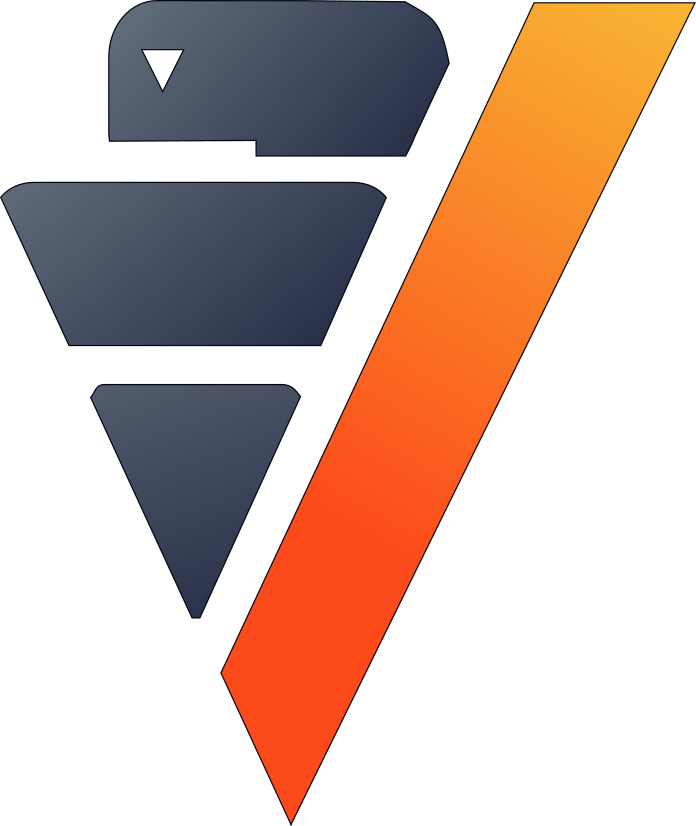

In [38]:
# Is Fiber optic a Bad Option? - VerticaPy

churn.groupby(["InternetService_Fiber_optic"], 
              [st.avg(churn["tenure"])._as("tenure"),
               st.avg(churn["totalcharges"])._as("totalcharges"),
               st.avg(churn["contract_month-to-month"])._as("contract_month_to_month"),
               st.avg(churn["monthlycharges"])._as("monthlycharges")])

It seems like the 'Fiber Optic' option in and of itself doesn't lead to churning, but customers that have this option tend to churn because their contract puts them into one of the three categories we listed before: they're paying more.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!